Training model with adam optimizer...
Training model with sgd optimizer...
Training model with rmsprop optimizer...

adam optimizer:
Accuracy: 0.9761
Training Time: 31.77 seconds


sgd optimizer:
Accuracy: 0.9342
Training Time: 19.91 seconds


rmsprop optimizer:
Accuracy: 0.9745
Training Time: 41.71 seconds



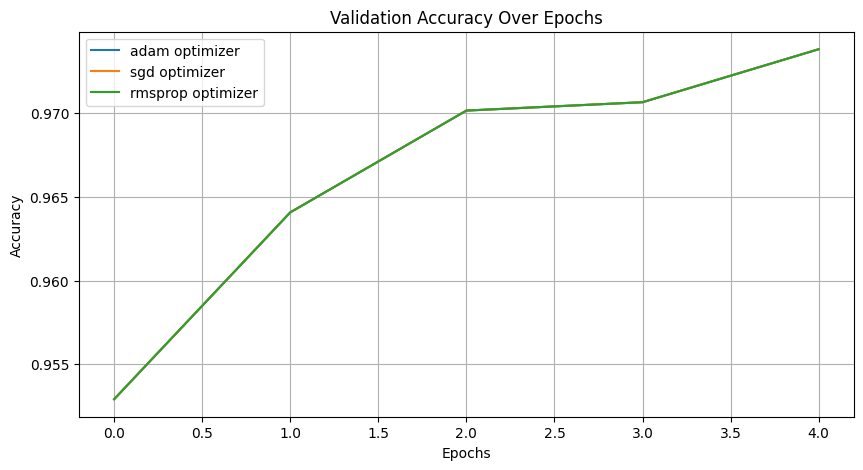

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Function to create a neural network model
def create_model(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# List of optimizers to compare
optimizers = ['adam', 'sgd', 'rmsprop']
results = {}

# Loop through each optimizer
for optimizer in optimizers:
    print(f"Training model with {optimizer} optimizer...")

    # Create the model
    model = create_model(optimizer)

    # Record start time
    start_time = datetime.now()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2, verbose=0)

    # Record end time
    end_time = datetime.now()

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    # Save results for later comparison
    results[optimizer] = {'accuracy': test_acc, 'training_time': (end_time - start_time).total_seconds()}

# Display results
for optimizer, result in results.items():
    print(f"\n{optimizer} optimizer:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Training Time: {result['training_time']:.2f} seconds\n")

# Plot validation accuracy over epochs for each optimizer
plt.figure(figsize=(10, 5))
for optimizer, result in results.items():
    plt.plot(history.history['val_accuracy'], label=f'{optimizer} optimizer')

plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()